In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [73]:
df = pd.read_csv('/content/insurance.csv')

In [74]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
df.shape

(1338, 7)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [77]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [78]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


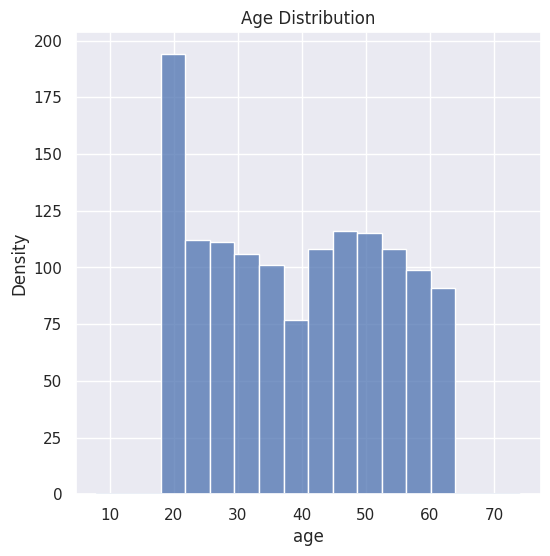

In [79]:
sns.set()
plt.figure(figsize=(6,6))
sns.kdeplot(df['age'])
sns.histplot(df['age'])
plt.title("Age Distribution")
plt.show()

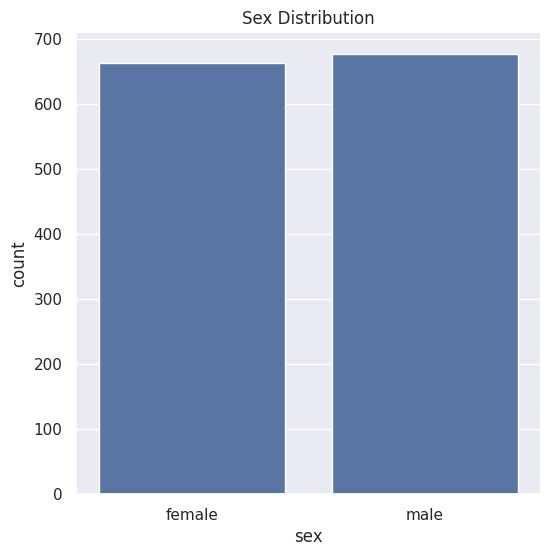

In [80]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex' , data=df)
plt.title("Sex Distribution")
plt.show()

In [81]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


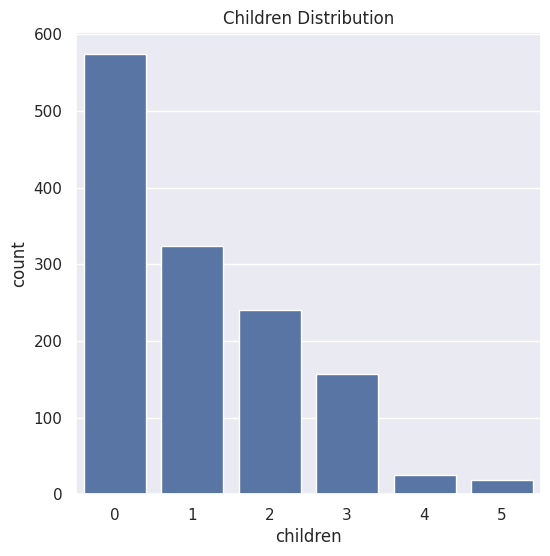

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(x='children' , data=df)
plt.title("Children Distribution")
plt.show()

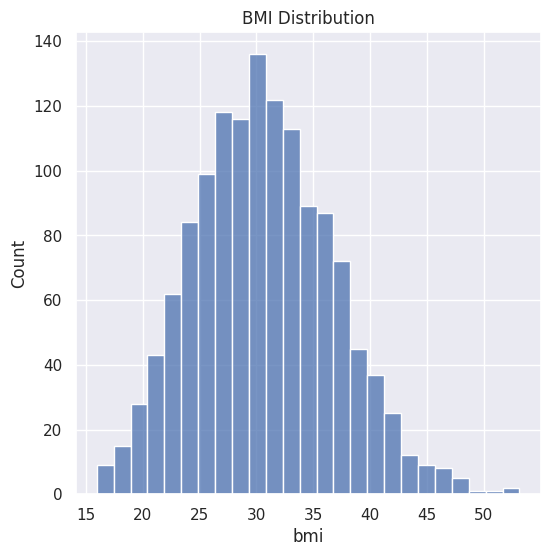

In [83]:
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

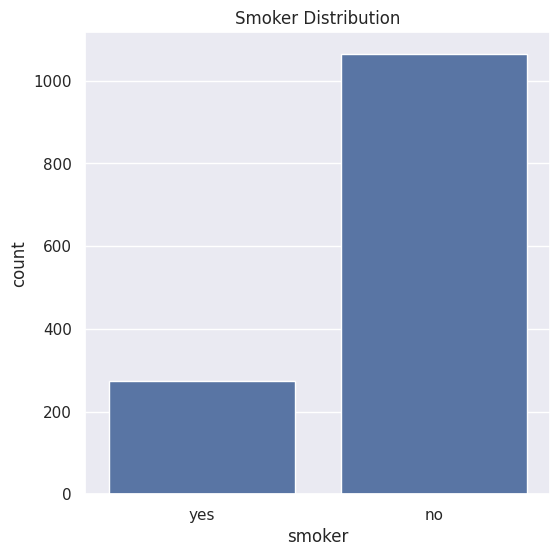

In [84]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' , data=df)
plt.title("Smoker Distribution")
plt.show()

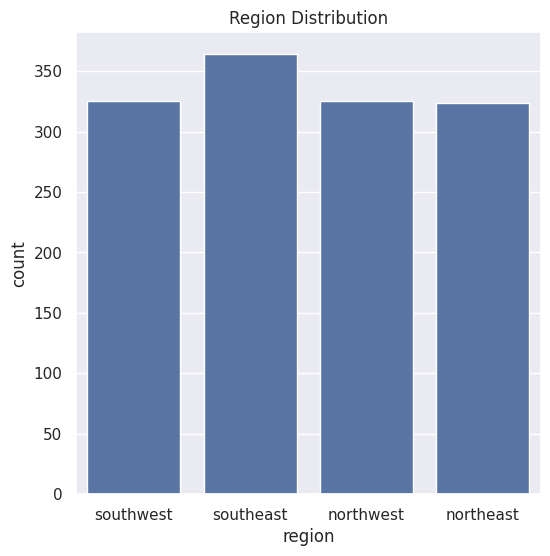

In [85]:
plt.figure(figsize=(6,6))
sns.countplot(x='region' , data=df)
plt.title("Region Distribution")
plt.show()

In [86]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


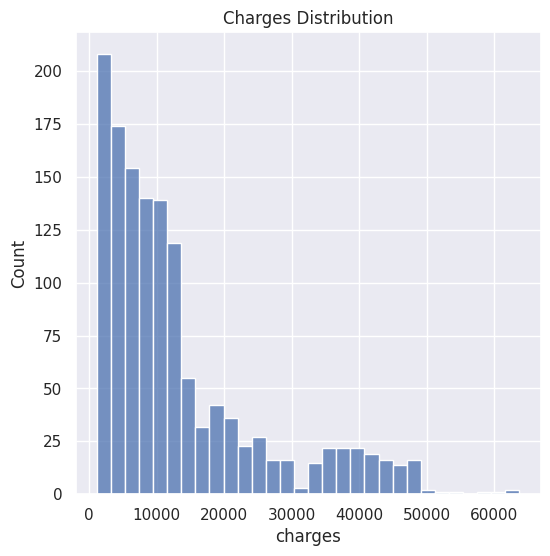

In [87]:
plt.figure(figsize=(6,6))
sns.histplot(x='charges' , data=df)
plt.title("Charges Distribution")
plt.show()

In [88]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipython-input-88-2649889890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-88-2649889890.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-88-2649889890.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

In [89]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [90]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [91]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [92]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [93]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [94]:
model=LinearRegression()

In [95]:
model.fit(X_train,Y_train)

LinearRegression()

In [96]:
prediction = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, prediction)
print("R squared error (train) : ", r2_train)

prediction = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, prediction)
print("R squared error (test) : ", r2_test)

R squared error (train) :  0.7472945022920751
R squared error (test) :  0.7618294350214682


In [97]:
sample_data = pd.DataFrame([
    {'age': 45, 'sex': 0, 'bmi': 28.5, 'children': 2, 'smoker': 1, 'region': 3},  # Non-smoking male in northwest
    {'age': 29, 'sex': 1, 'bmi': 23.1, 'children': 0, 'smoker': 0, 'region': 0},  # Smoking female in southeast
    {'age': 61, 'sex': 1, 'bmi': 30.9, 'children': 1, 'smoker': 1, 'region': 2},  # Non-smoking senior female in northeast
    {'age': 35, 'sex': 0, 'bmi': 35.6, 'children': 3, 'smoker': 0, 'region': 1}   # Smoking male in southwest
])
prediction = model.predict(sample_data)

print('The insurance cost: ')
for i in prediction:
  print(f'${i: .2f}')

The insurance cost: 
$ 9863.84
$ 26423.65
$ 14300.40
$ 33181.49
